### Imports Usados

In [237]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

### Função sinc(t) = sin(x)/x

In [238]:
def sinc_func(x):
    if(x == 0): return 1                # divisao por zero
    else:       return math.sin(x)/x 

### Critérios de parada para todos os métodos

In [239]:
# interacoes maximas
max_iter = 100

# erro erro_toleradorado
error = 1e-6

### arrays para salvar o erro e valores de cada método

In [240]:
# bissecção
error_biss  = []
values_biss = []

# ponto medio
error_mid   = []
values_mid  = []

# newton
error_new   = []
values      = []

# secante
error_sec   = []
values_sec  = []

### Plot da função com x entre [0.1, 8]

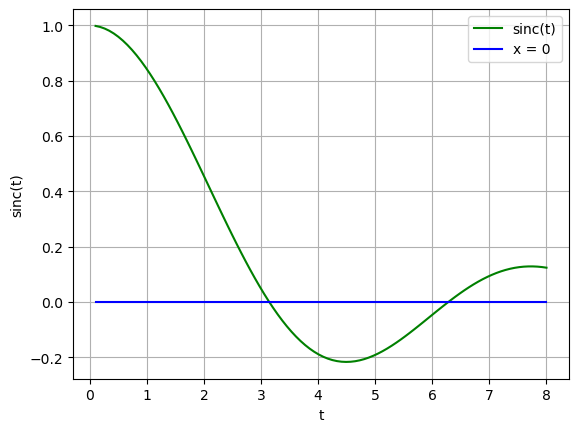

In [241]:
x = np.linspace(0.1, 8, 100)
y0 = np.zeros(100)
y1 = [sinc_func(i) for i in x]

plt.plot(x, y1, 'g')
plt.plot(x, y0, 'b')
plt.xlabel('t')
plt.ylabel('sinc(t)')
plt.grid(True)
plt.legend(['sinc(t)', 'x = 0'])
plt.show()

# --- MÉTODO DA BISSECÇÃO ---

### Intervalo que contêm uma raiz

In [242]:
init    = 3.0
end     = 3.5

### Verificamos o teorema de Bolzano

In [243]:
# precisao de maquina 
eps = sys.float_info.epsilon

# se colocar invertido meu algoritmo buga, teria q mudar a ordem
if(init >= end):
    print("Intervalo invalido: [{:.3f}, {:.3f}]".format(init, end))

if(sinc_func(init) * sinc_func(end) > 0):
    print("O intervalo nao passa no teorema de Bolzano.")

if(abs(sinc_func(init)) < eps):  
    print("Init esta muito proximo de zero.")                
    print("Raiz em x:", init)
if(abs(sinc_func(end)) < eps):                   
    print("End esta muito proximo de zero")
    print("Raiz em x:", end)

### Aplicando o método da bissecção para achar a raiz

In [244]:
# salva o valor final da raiz
mid_point = 0

for i in range(max_iter):
    # calculo do ponto medio
    mid_point = (init + end)/2
    values_biss.append(mid_point)

    # verificacao de parada
    error_biss.append(abs(sinc_func(mid_point)))
    if error_biss[i] < error:
        break

    # calculamos ponto para a proxima iteracao
    if sinc_func(mid_point) < 0:
        end = mid_point
    else:
        init = mid_point

print(f"Aproximado:\t{mid_point:.15f}")
print(f"Raiz real:\t{math.pi:.15f}")
print(f"Erro:\t\t{abs(mid_point - math.pi):.2e}")
print(f"\nIterações:\t{len(values_biss)}")

Aproximado:	3.141593933105469
Raiz real:	3.141592653589793
Erro:		1.28e-06

Iterações:	16


### Plote do erro e dos valores ao longo das iterações

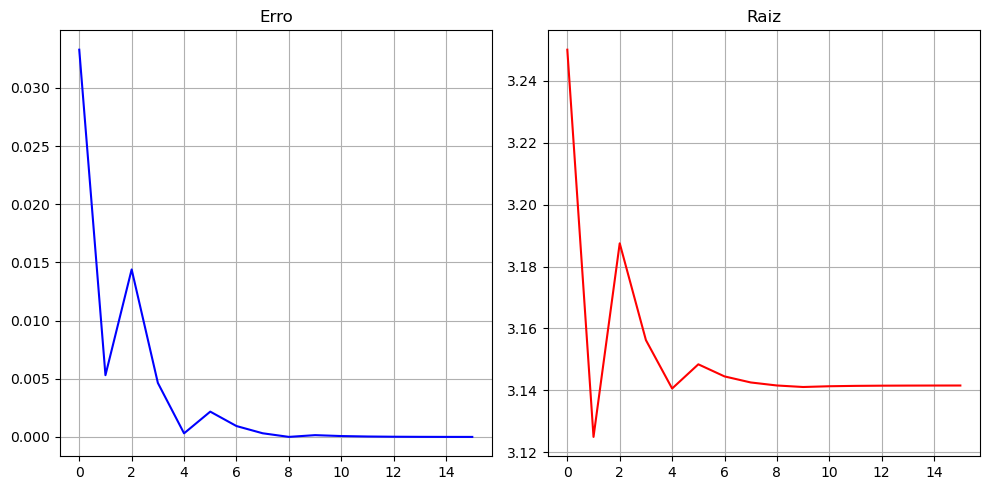

In [245]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Erro
ax1.plot([i for i in range(len(error_biss))], error_biss, color='b')
ax1.set_title('Erro')
ax1.grid()

# solucoes
ax2.plot([i for i in range(len(values_biss))], values_biss, color='r')
ax2.set_title('Raiz')
ax2.grid()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# --- MÉTODO DO PONTO FIXO ---

### Intervalo que contêm uma raiz

In [246]:
init    = 6.0
end     = 6.5

### g(x) para encontrar a raiz da função usando o método do ponto fixo

In [247]:
def g(x):
    return x - (math.sin(x)/x)

def g_linha(x):
    return 1 - ((x*math.cos(x) - math.sin(x))/x**2)

### Plotando as funções para verificar a continuidade e que a derivada é menor que 1 no intervalo

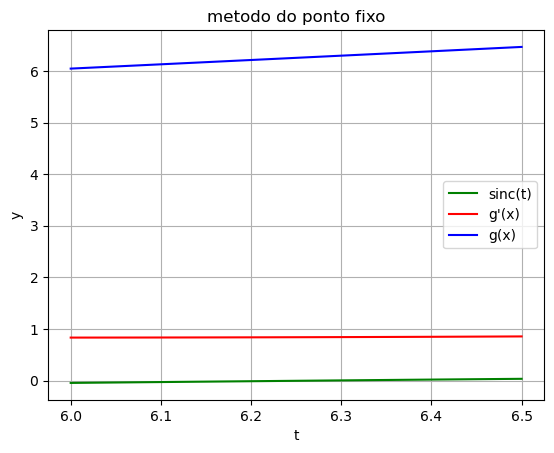

In [248]:
x = np.linspace(init, end, 100)
y0 = [g(i) for i in x]
y1 = [sinc_func(i) for i in x]
y2 = [g_linha(i) for i in x]

plt.plot(x, y1, 'g')
plt.plot(x, y2, 'r')
plt.plot(x, y0, 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.title('metodo do ponto fixo')
plt.grid(True)
plt.legend(['sinc(t)', 'g\'(x)', 'g(x)'])
plt.show()

### Aplicando o método do ponto fixo para achar a raiz

In [249]:
# solucoes do funcao
solution = 6.5 # chute inicial

for i in range(max_iter):
    # calculo da solucao
    current_solution = g(solution)
    values_mid.append(current_solution)

    # verificacao de parada
    error_mid.append(abs(solution - current_solution))
    if(error_mid[i] < error or current_solution < error):
        break

    # atualiza as solucaoes
    solution = current_solution

print(f"Aproximado:\t{solution:.15f}")
print(f"Raiz real:\t{2*math.pi:.15f}")
print(f"Erro:\t\t{abs(solution - (2*math.pi)):.2e}")
print(f"\nIterações:\t{len(values_mid)}")

Aproximado:	6.283191112128471
Raiz real:	6.283185307179586
Erro:		5.80e-06

Iterações:	62


### Plote do erro e dos valores ao longo das iterações

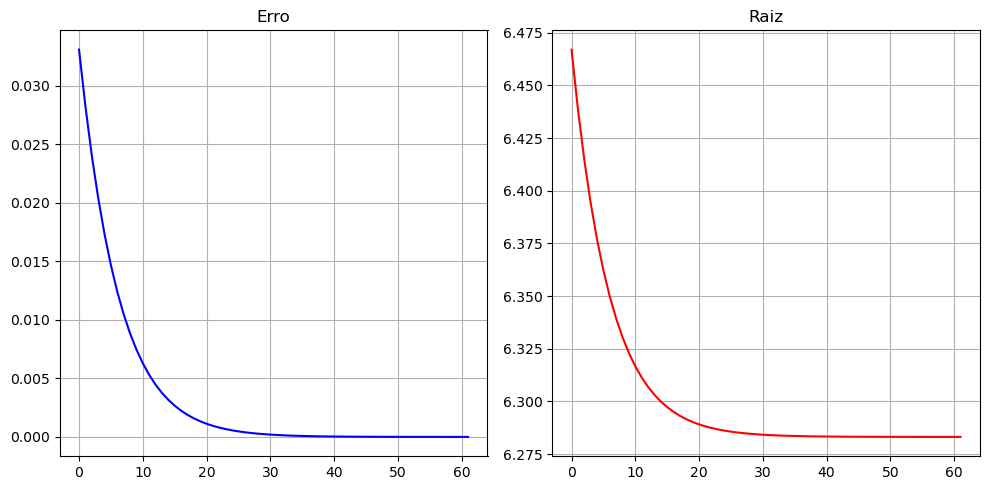

In [250]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Erro
ax1.plot([i for i in range(len(error_mid))], error_mid, color='b')
ax1.set_title('Erro')
ax1.grid()

# solucoes
ax2.plot([i for i in range(len(values_mid))], values_mid, color='r')
ax2.set_title('Raiz')
ax2.grid()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# --- MÉTODO DE NEWTON ---